In [52]:
from PIL import Image
from pylab import *
from scipy.ndimage import filters

In [2]:
pil_im = Image.open('test_image.jpg')

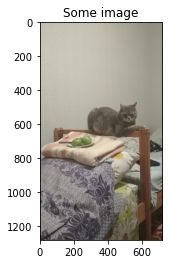

In [4]:
im = array(pil_im)
imshow(im)
title('Some image')
show()

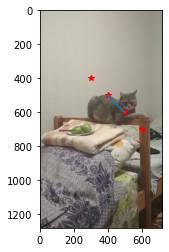

In [9]:
x = [300,400,500,600]
y = [400,500,600,700]

plot(x,y,'r*')
plot(x[1:3], y[1:3])
imshow(im)
show()

In [15]:
pil_im = Image.open('test_image.jpg')
pil_im.thumbnail((128,128))
pil_im.save('th.jpg')


In [17]:
pil_im = Image.open('test_image.jpg')
pil_im.convert('L').save('pt.jpg')

In [18]:
pil_im = Image.open('test_image.jpg')
out = pil_im.rotate(45)
out.save('rot.jpg')

In [19]:
pil_im = Image.open('test_image.jpg')


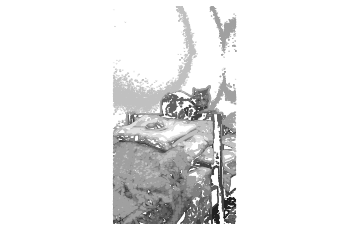

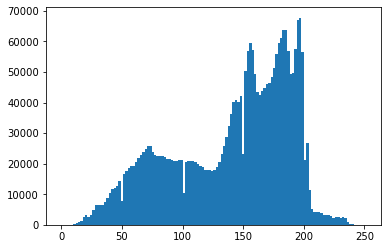

In [20]:
gray_im = array(pil_im.convert('L'))

figure()
gray()
contour(gray_im,origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(),128)
show()

In [23]:
# im = Image.open('test_image.jpg')
# imshow(im)
# show()
# print('Тыкни три точки')
# x = ginput(3)
# print('вы ткнули:', x)

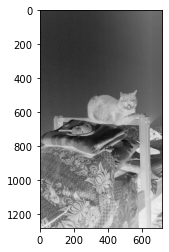

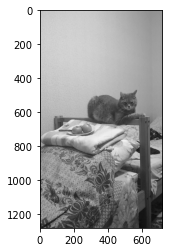

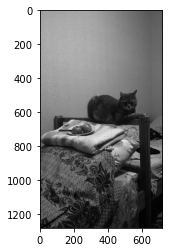

In [25]:
im = array(Image.open('test_image.jpg').convert('L'))
im2 = 255-im #инверсия
im3 = (100.0/255)*im +100 #привести к интервалу 100-200
im4 = 255.0 * (im/255.0)**2 #применить квадратичную функу

figure()
imshow(im2)
figure()
imshow(im3)
figure()
imshow(im4)
show()

In [27]:
pil_im2 = Image.fromarray(uint8(im))

In [28]:
def histeq(im,nbr_bins=256):
    #Выравнивание гистограммы полутонового изображения
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]

    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

In [36]:
im = array(Image.open('test_image.jpg').convert('L'))
im2,cdf = histeq(im)

C:\Users\AB8E~1.WIN\AppData\Local\Temp\1/ipykernel_22912/2902459886.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)


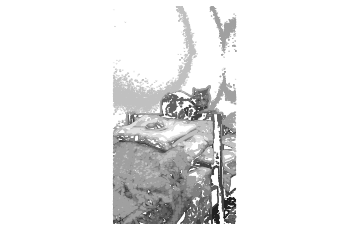

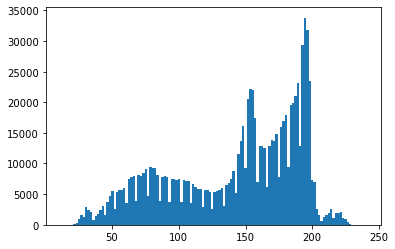

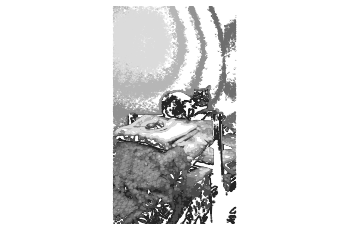

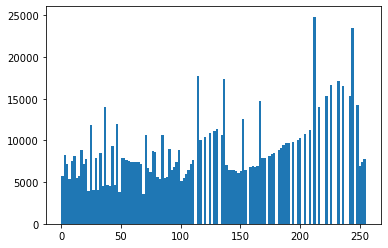

In [37]:
figure()
gray()
contour(im,origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(),128)

figure()
gray()
contour(im2,origin='image')
axis('equal')
axis('off')

figure()
hist(im2.flatten(),128)
show()

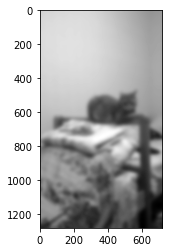

In [43]:
im = array(Image.open('test_image.jpg').convert('L'))
im2 = filters.gaussian_filter(im,10)

imshow(im2)
show()

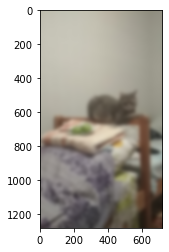

In [44]:
im = array(Image.open('test_image.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],10)
im2 = uint8(im2)

imshow(im2)
show()

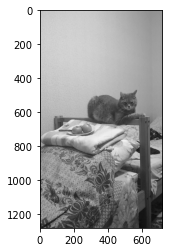

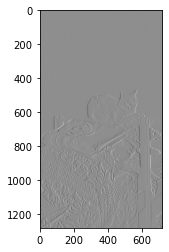

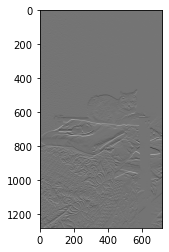

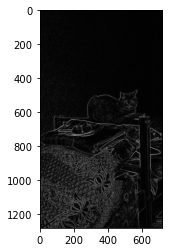

In [47]:
im = array(Image.open('test_image.jpg').convert('L'))

#Операторы Собеля
imx = zeros(im.shape)
filters.sobel(im,1,imx)

imy = zeros(im.shape)
filters.sobel(im,0,imy)

magnitude = sqrt(imx**2+imy**2)

figure()
imshow(im)
figure()
imshow(imx)
figure()
imshow(imy)
figure()
imshow(magnitude)
show()

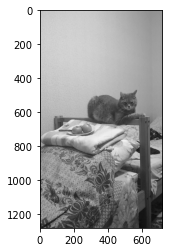

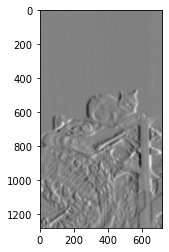

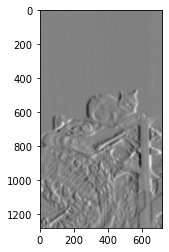

In [48]:
im = array(Image.open('test_image.jpg').convert('L'))

sigma = 5

imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)

imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imy)

figure()
imshow(im)
figure()
imshow(imx)
figure()
imshow(imy)
show()